In [232]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Importing the dataset

In [233]:
df=pd.read_csv("BreastCancer.csv")

In [234]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Gerneral informations

In [235]:
df.shape

(569, 33)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [237]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Preprocessing

In [238]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [239]:
df.drop(['id'],axis=1,inplace=True)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [241]:
print("Missing values:",df.isnull().sum().sum())

Missing values: 0


# Data Visualization

# - Correlation Map

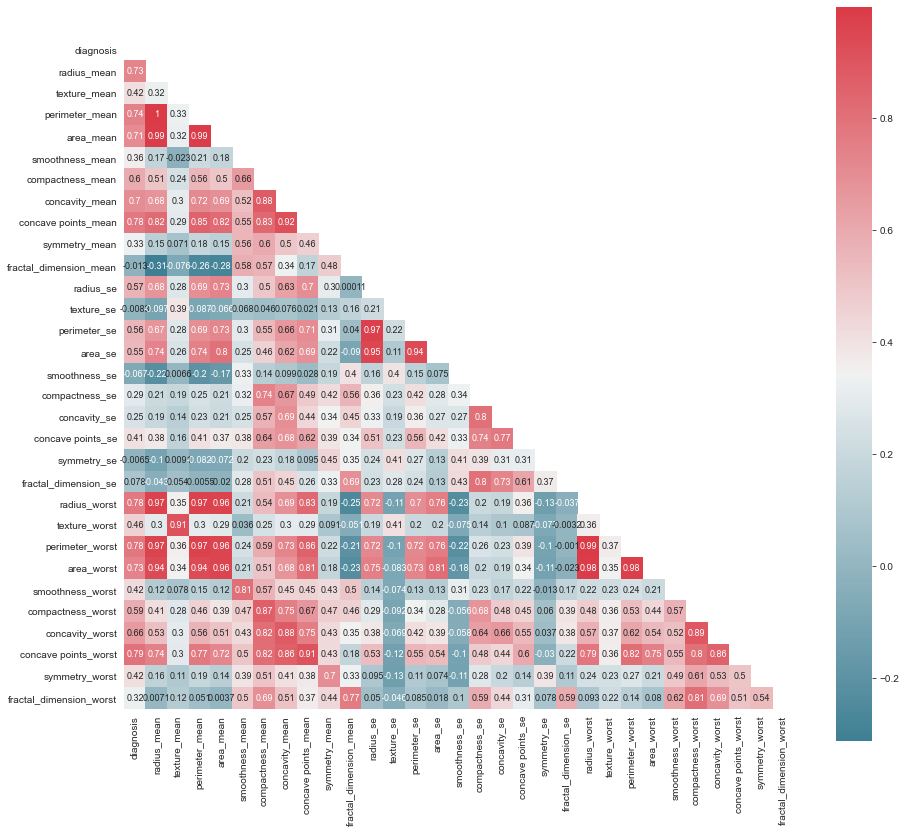

In [266]:
def plot_correlation_map( df ):


    corr=df.corr()
    s , ax = plt.subplots( figsize =( 15 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    
    mask = np.triu(np.ones_like(corr, dtype=bool))

    s = sns.heatmap(

        corr, 

        cmap = cmap,
        
        mask=mask, 

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 9 }

        )
plot_correlation_map(df)

B    357
M    212
Name: diagnosis, dtype: int64


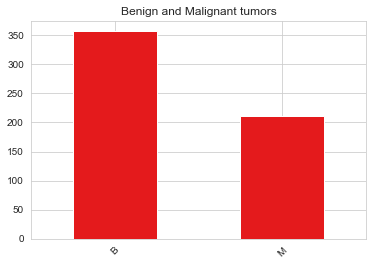

In [243]:
vc=df["diagnosis"].value_counts()
vc.plot.bar(rot=45,colormap="Set1",title="Benign and Malignant tumors")
print(vc)

* Categorical to Numerical
    - 0 : Benign
    - 1 : Malignant

In [244]:
encoder=LabelEncoder()
df['diagnosis']=encoder.fit_transform(df['diagnosis'])
print(df['diagnosis'].value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


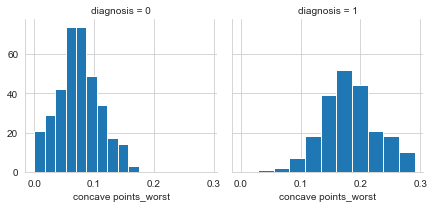

In [245]:
g=sns.FacetGrid(df,col='diagnosis')
g.map(plt.hist,"concave points_worst")
g.add_legend()

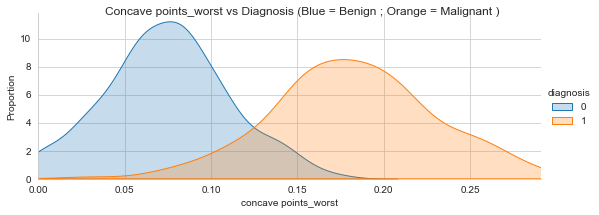

In [246]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="diagnosis",aspect=2.5)
plotOne.map(sns.kdeplot,"concave points_worst",shade=True)
plotOne.set(xlim=(0, df["concave points_worst"].max()))
plotOne.add_legend()
plotOne.set_axis_labels("concave points_worst", 'Proportion')
plotOne.fig.suptitle('Concave points_worst vs Diagnosis (Blue = Benign ; Orange = Malignant )')
plt.show()

# we can notice:
 * mean value for number of concave portions of the contour < 0.1 Cancer is probably Benign
 * mean value for number of concave portions of the contour > 0.15 Cancer is probably Malignant

Text(0.5, 1.0, 'Graph of compactness mean vs diagnosis of tumor')

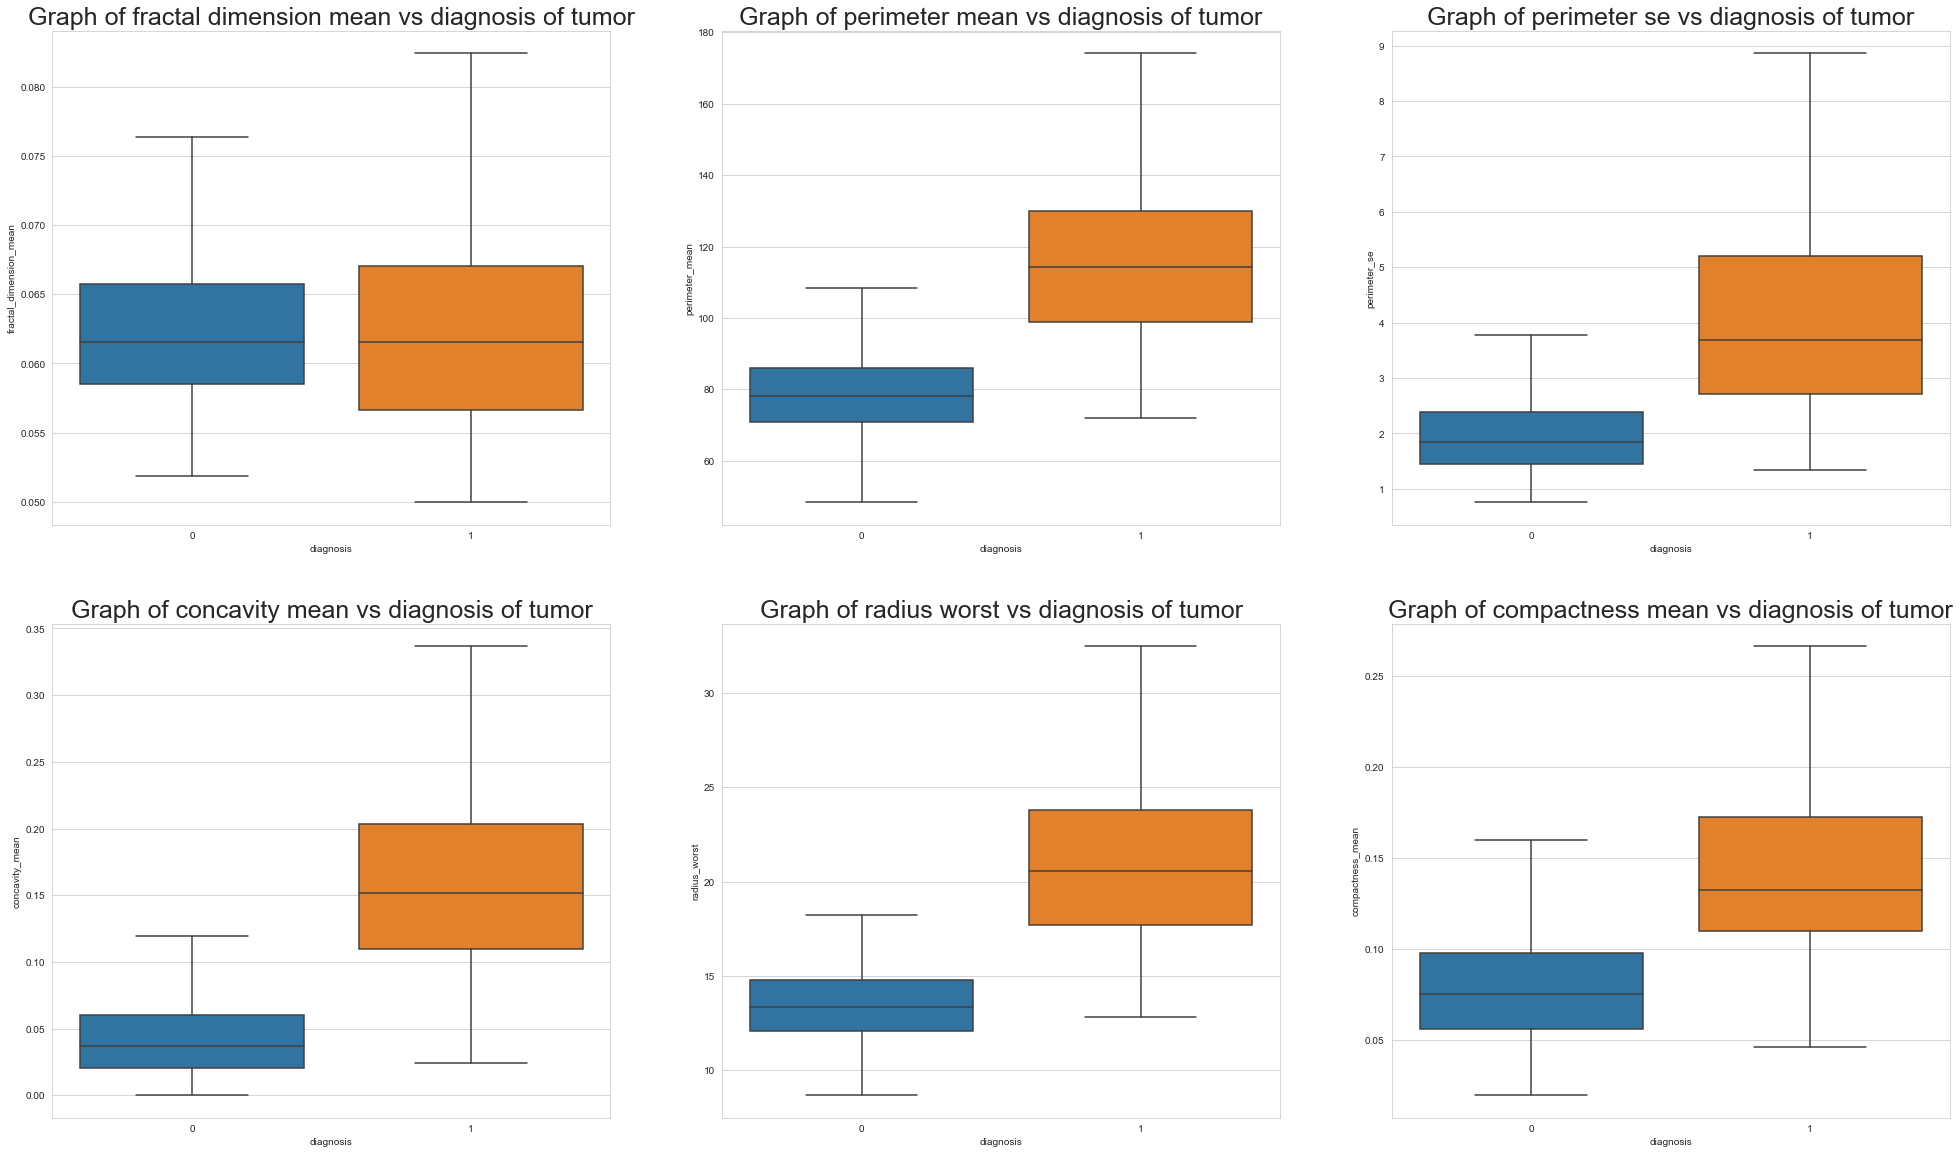

In [247]:
f, axes = plt.subplots(2,3, figsize=(34,20))
plot = sns.boxplot(x="diagnosis", y="fractal_dimension_mean", data=df, showfliers=False,ax=axes[0][0])
axes[0][0].set_title("Graph of fractal dimension mean vs diagnosis of tumor", fontsize = 25)

plot = sns.boxplot(x="diagnosis", y="perimeter_mean", data=df, showfliers=False,ax=axes[0][1])
axes[0][1].set_title("Graph of perimeter mean vs diagnosis of tumor", fontsize = 25)

plot = sns.boxplot(x="diagnosis", y="perimeter_se", data=df, showfliers=False,ax=axes[0][2])
axes[0][2].set_title("Graph of perimeter se vs diagnosis of tumor", fontsize = 25)

plot = sns.boxplot(x="diagnosis", y="concavity_mean", data=df, showfliers=False,ax=axes[1][0])
axes[1][0].set_title("Graph of concavity mean vs diagnosis of tumor", fontsize = 25)

plot = sns.boxplot(x="diagnosis", y="radius_worst", data=df, showfliers=False,ax=axes[1][1])
axes[1][1].set_title("Graph of radius worst vs diagnosis of tumor", fontsize = 25)

plot = sns.boxplot(x="diagnosis", y="compactness_mean", data=df, showfliers=False,ax=axes[1][2])
axes[1][2].set_title("Graph of compactness mean vs diagnosis of tumor", fontsize = 25)

- Fractal dimension means are almost the same for malignant and benign tumors. So we are sure that this feature won't help us in the diagnostic.
- Malignant tumors tend to have a higher perimeter mean, concavity mean and compactness mean compared to benign.
- For example: if perimeter mean is higher than 110 we are sur that cancer is Malignant.

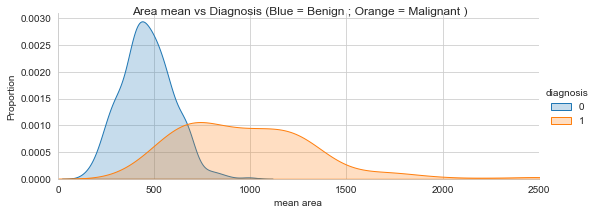

In [248]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="diagnosis",aspect=2.5)
plotOne.map(sns.kdeplot,'area_mean',shade=True)
plotOne.set(xlim=(0, df['area_mean'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('mean area', 'Proportion')
plotOne.fig.suptitle('Area mean vs Diagnosis (Blue = Benign ; Orange = Malignant )')
plt.show()

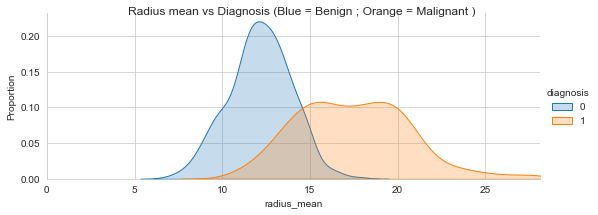

In [249]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="diagnosis",aspect=2.5)
plotOne.map(sns.kdeplot,'radius_mean',shade=True)
plotOne.set(xlim=(0, df['radius_mean'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('radius_mean', 'Proportion')
plotOne.fig.suptitle('Radius mean vs Diagnosis (Blue = Benign ; Orange = Malignant )')
plt.show()

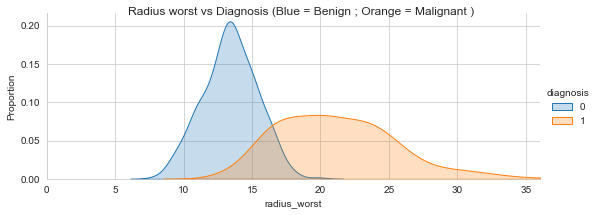

In [250]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="diagnosis",aspect=2.5)
plotOne.map(sns.kdeplot,'radius_worst',shade=True)
plotOne.set(xlim=(0, df['radius_worst'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('radius_worst', 'Proportion')
plotOne.fig.suptitle('Radius worst vs Diagnosis (Blue = Benign ; Orange = Malignant )')
plt.show()

# Knn

In [251]:
x = df
y = df['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) 

knn=KNeighborsClassifier(n_neighbors=20) 
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test)  
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9122807017543859


In [252]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.9
Accuracy for k= 2 is: 0.9
Accuracy for k= 3 is: 0.9
Accuracy for k= 4 is: 0.9
Accuracy for k= 5 is: 0.9
Accuracy for k= 6 is: 0.9
Accuracy for k= 7 is: 0.91
Accuracy for k= 8 is: 0.9
Accuracy for k= 9 is: 0.91
Accuracy for k= 10 is: 0.91
Accuracy for k= 11 is: 0.91
Accuracy for k= 12 is: 0.91
Accuracy for k= 13 is: 0.91
Accuracy for k= 14 is: 0.91
Accuracy for k= 15 is: 0.91
Accuracy for k= 16 is: 0.91
Accuracy for k= 17 is: 0.92
Accuracy for k= 18 is: 0.91
Accuracy for k= 19 is: 0.92
Accuracy for k= 20 is: 0.91
Accuracy for k= 21 is: 0.92
Accuracy for k= 22 is: 0.92
Accuracy for k= 23 is: 0.92
Accuracy for k= 24 is: 0.91
Accuracy for k= 25 is: 0.91
Accuracy for k= 26 is: 0.92
Accuracy for k= 27 is: 0.93
Accuracy for k= 28 is: 0.9
Accuracy for k= 29 is: 0.91


Text(0, 0.5, 'Testing Accuracy')

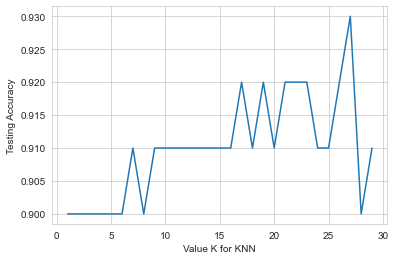

In [253]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

- Best K value: 27 with accuracy = 0.93 but it's still low so we will try Logistic Regression

# Logistic Regression

In [254]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend()
    plt.show()

In [255]:
def logistic_Regression(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)  
    logreg = LogisticRegression()  
    logreg.fit(x_train, y_train)  
    y_pred  = logreg.predict(x_test)  
    print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)
    print(classification_report(y_test,y_pred))
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    probs = model.predict_proba(x_test)[:, 1]   
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.2f' % auc)
   

Accuracy=0.93
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

AUC: 0.99


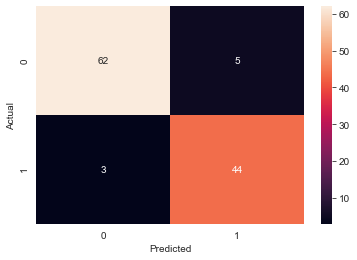

In [256]:
x = df[['concave points_worst','concave points_mean','area_mean','area_worst','radius_mean','radius_worst','perimeter_worst']]
y = df['diagnosis']
logistic_Regression(x,y)

In [257]:
df1=df.drop(['diagnosis'],axis=1)

In [258]:
x = df1
y = df['diagnosis']

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy=0.95
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

AUC: 1.00


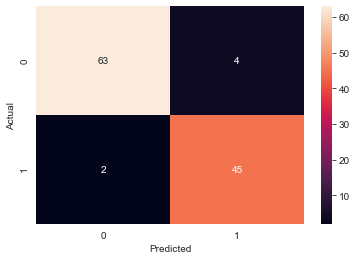

In [259]:
logistic_Regression(x,y)

In [260]:
df2=df.drop(['fractal_dimension_worst'],axis=1)
df2.drop(['fractal_dimension_se'],axis=1,inplace=True)

In [261]:
x = df2
y = df2['diagnosis']

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy=0.97
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC: 1.00


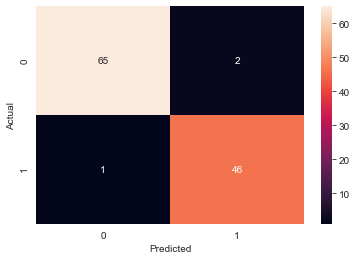

In [262]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)  
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(classification_report(y_test,y_pred))
model = RandomForestClassifier()
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)[:, 1]   
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
  

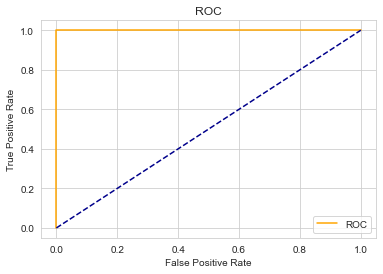

In [263]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Best accuracy = 0.97